In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# mtf_file = "mtf/UltraScan1000FT.csv"
mtf_file = "mtf/K3.csv"

array([[0.        , 1.        ],
       [0.01587302, 0.99200644],
       [0.03174603, 0.98448253],
       [0.04761905, 0.97722011],
       [0.06349206, 0.97003662],
       [0.07936508, 0.96277324],
       [0.09523809, 0.95529344],
       [0.11111111, 0.94748151],
       [0.12698413, 0.93924122],
       [0.14285714, 0.93049444],
       [0.15873016, 0.92117985],
       [0.17460317, 0.91125164],
       [0.19047619, 0.90067828],
       [0.20634921, 0.88944133],
       [0.22222222, 0.87753423],
       [0.23809524, 0.86496122],
       [0.25396825, 0.85173623],
       [0.26984127, 0.83788179],
       [0.28571429, 0.82342804],
       [0.3015873 , 0.80841175],
       [0.31746032, 0.79287534],
       [0.33333333, 0.77686601],
       [0.34920635, 0.76043481],
       [0.36507936, 0.74363586],
       [0.38095238, 0.72652551],
       [0.3968254 , 0.70916157],
       [0.41269841, 0.69160261],
       [0.42857143, 0.67390724],
       [0.44444445, 0.65613347],
       [0.46031746, 0.63833806],
       [0.

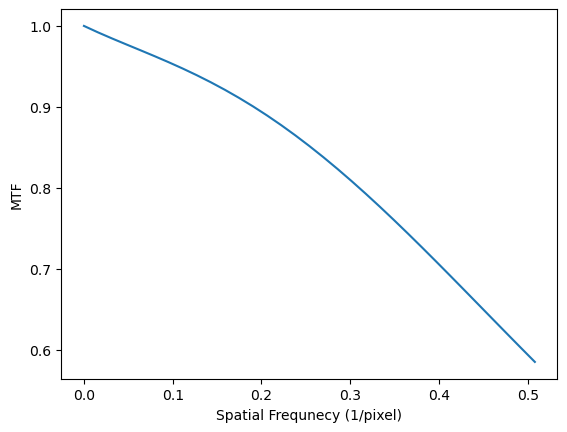

In [19]:
# Load the mtf
mtf = np.genfromtxt(mtf_file, delimiter=",")

# Sort the MTF by spatial frequnecy
mtf = mtf[mtf[:, 0].argsort(), :]

plt.plot(mtf[:, 0], mtf[:, 1])
plt.xlabel("Spatial Frequnecy (1/pixel)")
plt.ylabel("MTF")

mtf

Text(0, 0.5, 'MTF')

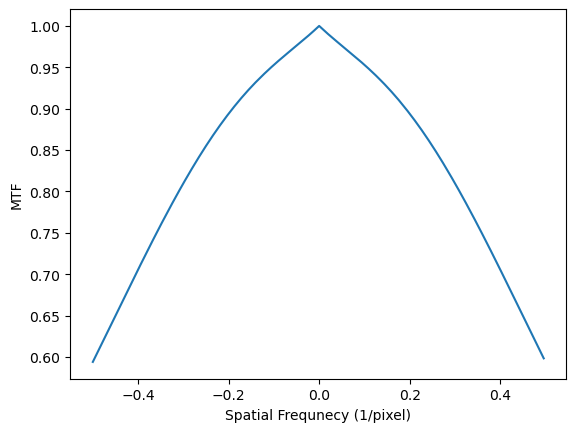

In [20]:
# Image size
N = 256

# Compute the fft bins
freqs = np.fft.fftshift(np.fft.fftfreq(N))

# Interpolate the MTF to the frequnecy bins
measured_mtfs = np.interp(abs(freqs), mtf[:, 0], mtf[:, 1])

plt.plot(freqs, measured_mtfs)
plt.xlabel("Spatial Frequnecy (1/pixel)")
plt.ylabel("MTF")

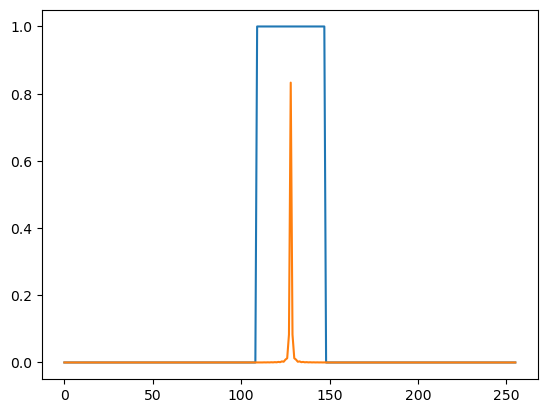

In [21]:
# Recover phase data with GS phase retrival
initial_phase = np.random.uniform(0, 2 * np.pi, (N,))
otf_i = measured_mtfs * np.exp(1j * initial_phase)

# Limited support constaint mask
counts = np.arange(0, N)
mask = abs(counts - N // 2) < 20

plt.figure()
plt.plot(mask)

for i in range(10000):
    # Compute the psf
    psf_i = np.fft.ifft(np.fft.ifftshift(otf_i))
    
    # Apply a real valued constraint to the psf
    psf_i = np.abs(psf_i)
    
    # Apply a limited support constraint to the psf
    psf_i[~mask] = 0
    
    # Shift the PSF so the peak is at the center
    peak_idx = np.argmax(psf_i)
    shift = N // 2 - peak_idx
    psf_i = np.roll(psf_i, shift)
    
    # Compute the otf
    otf_i = np.fft.fftshift(np.fft.fft(psf_i))
    
    # Compute the mtf and adjust the amplitude to match the measured mtf
    mtf_i = np.abs(otf_i)
    
    # Adjust the otf amplitude
    otf_i = otf_i * (measured_mtfs / mtf_i)
    
    # Enforce positive phase
    otf_i = np.real(otf_i) + abs(np.imag(otf_i)) * 1j

plt.plot(np.abs(psf_i))

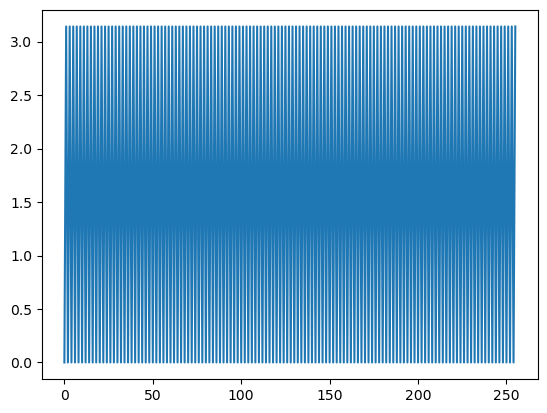

In [22]:
plt.figure()
plt.plot(np.angle(otf_i))

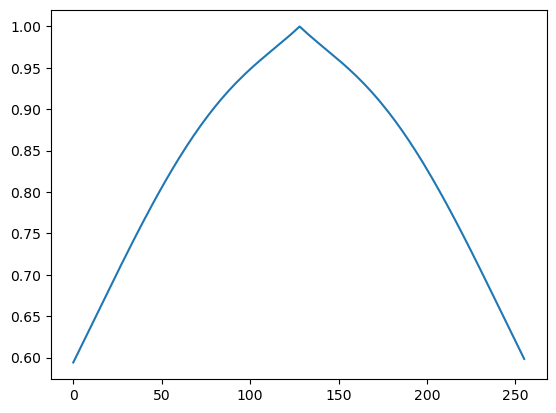

In [23]:
plt.plot(np.abs(otf_i))

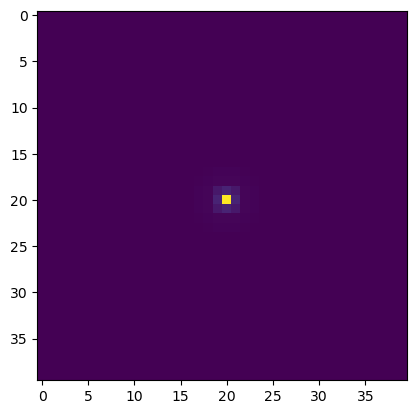

In [25]:
# Revolve the PSF
xs = np.arange(N)
ys = np.arange(N)

xs, ys = np.meshgrid(xs, ys)

# Compute the radii
rs = np.sqrt((xs - N // 2)**2 + (ys - N // 2)**2)

# Interpolate the mtf
full_psf = np.interp(rs, np.arange(N // 2), psf_i[N // 2:])

# Plot the output
# plt.imshow(full_psf)
plt.imshow(full_psf[N // 2 - 20:N // 2 + 20, N // 2 - 20:N // 2 + 20])

In [146]:
# # Generate the image vectors
# max_freq = np.max(mtf[:, 0])
# N = 2 * len(mtf[:, 0]) - 1
# xs = np.linspace(-max_freq, max_freq, N)
# ys = np.linspace(-max_freq, max_freq, N)

# xs, ys = np.meshgrid(xs, ys)

# # Compute the radii
# rs = np.sqrt(xs**2 + ys**2)

# # Interpolate the mtf
# measured_mtfs = np.interp(rs, mtf[:, 0], mtf[:, 1])

# # Plot the output
# plt.imshow(measured_mtfs)


In [66]:
# # Recover phase data with GS phase retrival
# initial_phase = np.random.uniform(0, 2 * np.pi, (N, N))
# otf_i = measured_mtfs * np.exp(1j * initial_phase)

# # Limited support constaint mask
# xs_i = np.arange(0, otf_i.shape[0])
# ys_i = np.arange(0, otf_i.shape[1])

# xs_i, ys_i = np.meshgrid(xs_i, ys_i)

# rs_i = np.sqrt((xs_i - otf_i.shape[0] // 2)**2 + (ys_i - otf_i.shape[1] // 2)**2)
# mask = rs_i < 15

# for i in range(10000):
#     # Compute the psf
#     psf_i = np.fft.ifft2(np.fft.ifftshift(otf_i))
    
#     # Apply a real valued constraint to the psf
#     psf_i = np.abs(psf_i)
    
#     # # Set the center value to 1
#     # psf_i[psf_i.shape[0] // 2, psf_i.shape[0] // 2] = 1
    
#     # Apply a limited support constraint to the psf
#     psf_i[~mask] = 0
    
#     # Compute the otf
#     otf_i = np.fft.fftshift(np.fft.fft2(psf_i))
    
#     # Compute the mtf and adjust the amplitude to match the measured mtf
#     mtf_i = np.abs(otf_i)
    
#     # Adjust the otf amplitude
#     otf_i = otf_i * (measured_mtfs / mtf_i)

# psf_i = np.fft.ifft2(np.fft.ifftshift(otf_i))
# plt.imshow(np.abs(psf_i))

TypeError: Invalid shape (256,) for image data

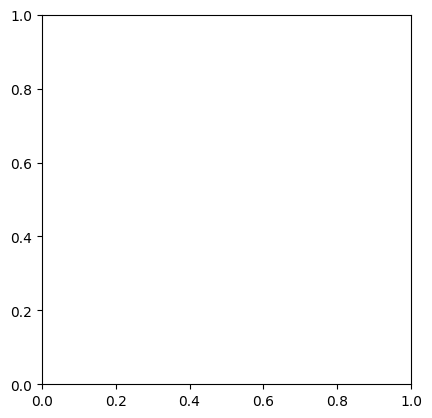

In [67]:
plt.imshow(np.angle(otf_i))